[*********************100%***********************]  1 of 1 completed


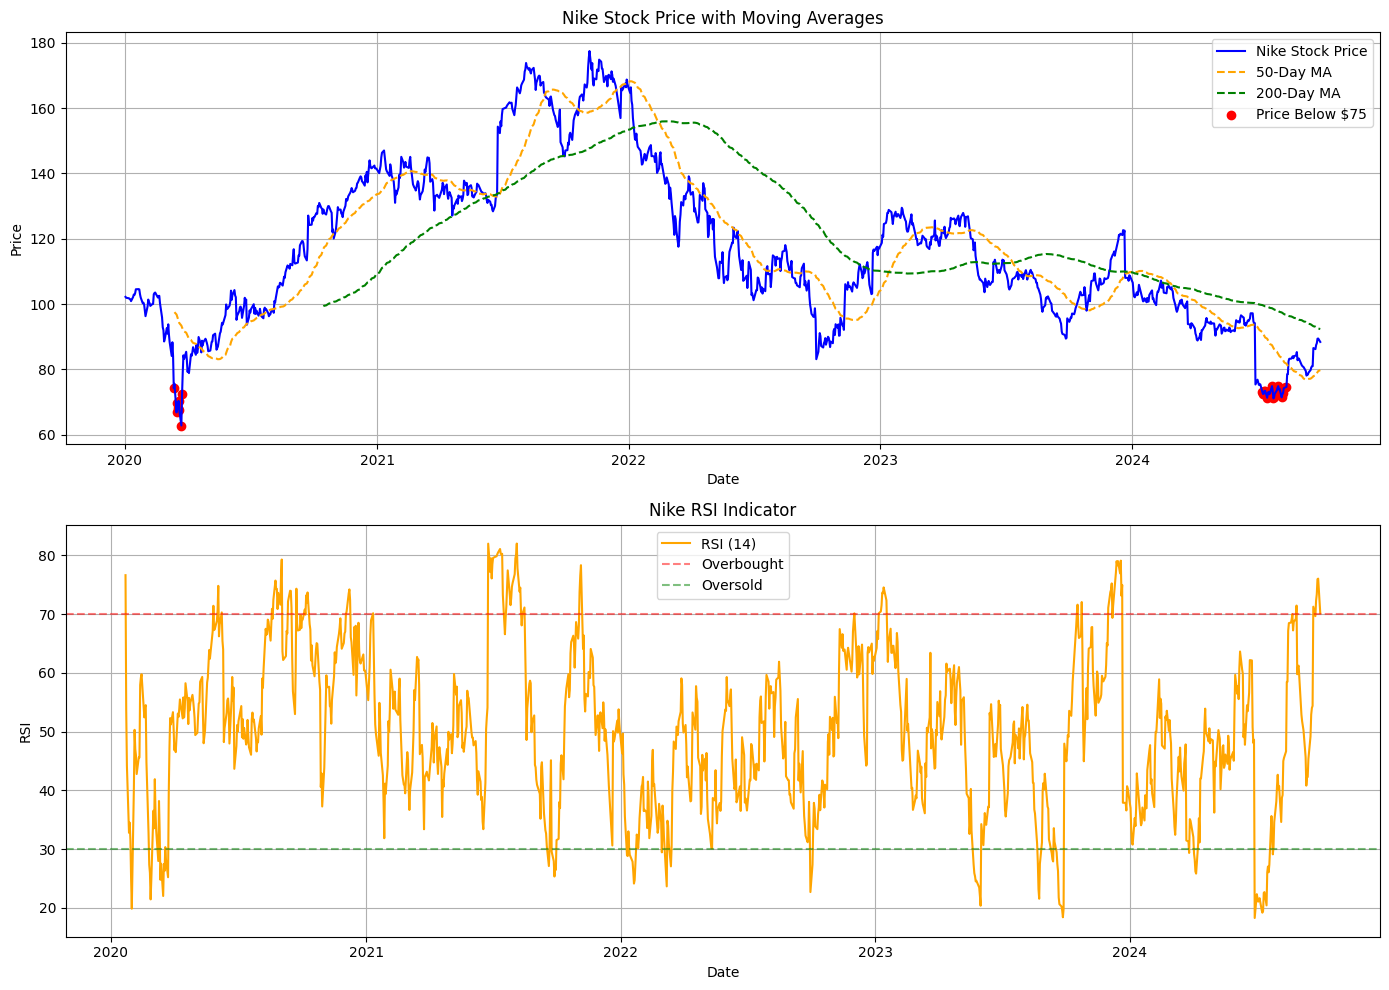

Dates when Nike stock was below $75:
2020-03-12 Price: 74.19999694824219
2020-03-16 Price: 66.79000091552734
2020-03-17 Price: 69.83999633789062
2020-03-18 Price: 68.04000091552734
2020-03-19 Price: 70.33999633789062
2020-03-20 Price: 67.44999694824219
2020-03-23 Price: 62.79999923706055
2020-03-24 Price: 72.33000183105469
2024-07-08 Price: 73.05000305175781
2024-07-09 Price: 72.45999908447266
2024-07-10 Price: 72.54000091552734
2024-07-11 Price: 73.38999938964844
2024-07-12 Price: 73.41999816894531
2024-07-15 Price: 71.30999755859375
2024-07-16 Price: 72.80999755859375
2024-07-17 Price: 73.06999969482422
2024-07-18 Price: 72.37999725341797
2024-07-19 Price: 72.69999694824219
2024-07-22 Price: 74.86000061035156
2024-07-23 Price: 73.4000015258789
2024-07-24 Price: 71.08999633789062
2024-07-25 Price: 71.41000366210938
2024-07-26 Price: 72.55999755859375
2024-07-29 Price: 73.55000305175781
2024-07-30 Price: 74.31999969482422
2024-07-31 Price: 74.86000061035156
2024-08-01 Price: 73.8499984

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import ta

# Step 1: Fetch historical stock price data for Nike
ticker = 'NKE'
start_date = '2020-01-01'
end_date = '2024-10-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Identify price lows (let's say we want to find the last 3 instances below $75)
low_threshold = 75
data['Low_Recent'] = data['Close'] < low_threshold
low_dates = data[data['Low_Recent']].index

# Step 3: Calculate moving averages and RSI
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()
data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()

# Step 4: Plot historical price data with technical indicators
plt.figure(figsize=(14, 10))

# Plot stock price with moving averages
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Nike Stock Price', color='blue')
plt.plot(data['50_MA'], label='50-Day MA', color='orange', linestyle='--')
plt.plot(data['200_MA'], label='200-Day MA', color='green', linestyle='--')
plt.scatter(low_dates, data.loc[low_dates]['Close'], color='red', marker='o', label='Price Below $75')
plt.title('Nike Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI (14)', color='orange')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought')
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold')
plt.title('Nike RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Print dates when Nike stock was below $75
print("Dates when Nike stock was below $75:")
for date in low_dates:
    print(date.strftime('%Y-%m-%d'), "Price:", data.loc[date]['Close'])


[*********************100%***********************]  1 of 1 completed


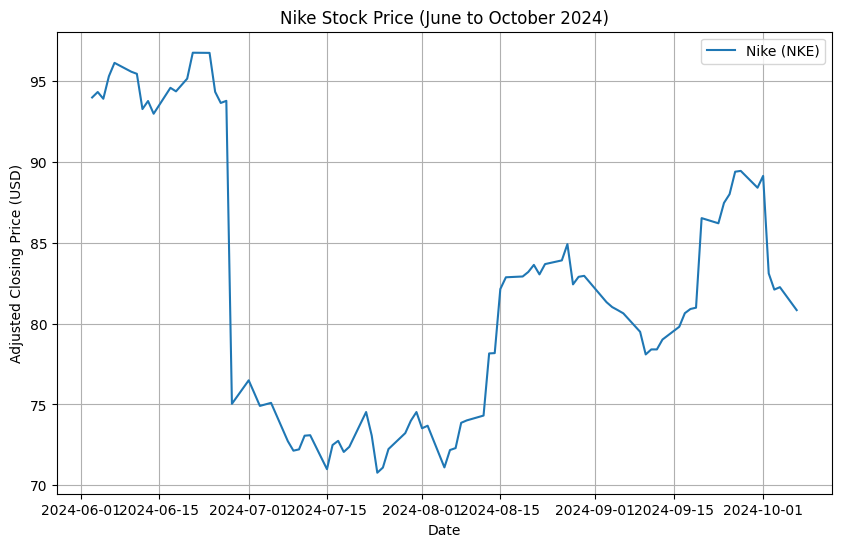

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for Nike
ticker = 'NKE'

# Define the date range
start_date = '2024-06-01'
end_date = '2024-10-08'

# Fetch the stock data
nike_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']

# Plotting the stock data
plt.figure(figsize=(10, 6))
plt.plot(nike_data, label='Nike (NKE)')
plt.title('Nike Stock Price (June to October 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  3 of 3 completed


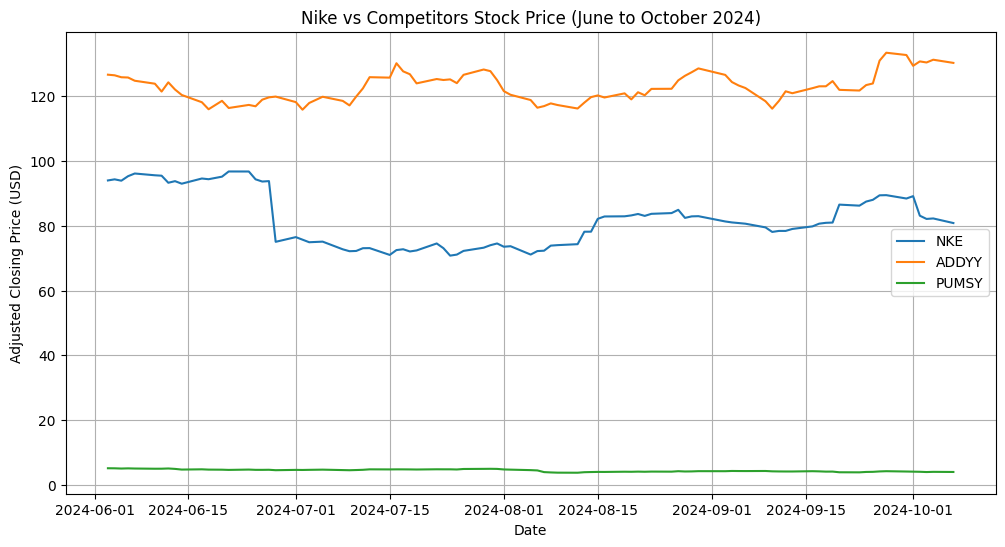

In [ ]:
tickers = ['NKE', 'ADDYY', 'PUMSY']


stock_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Plotting the stock data
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(stock_data[ticker], label=ticker)

plt.title('Nike vs Competitors Stock Price (June to October 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Normalize the stock prices by dividing each stock by its initial price (for comparison)
normalized_data = stock_data / stock_data.iloc[0] * 100

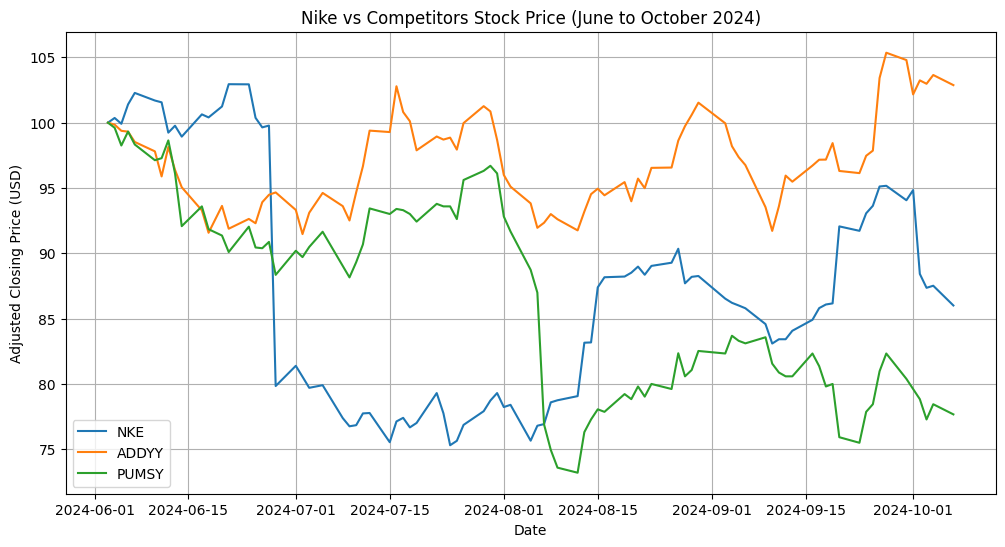

In [ ]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(normalized_data[ticker], label=ticker)

plt.title('Nike vs Competitors Stock Price (June to October 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


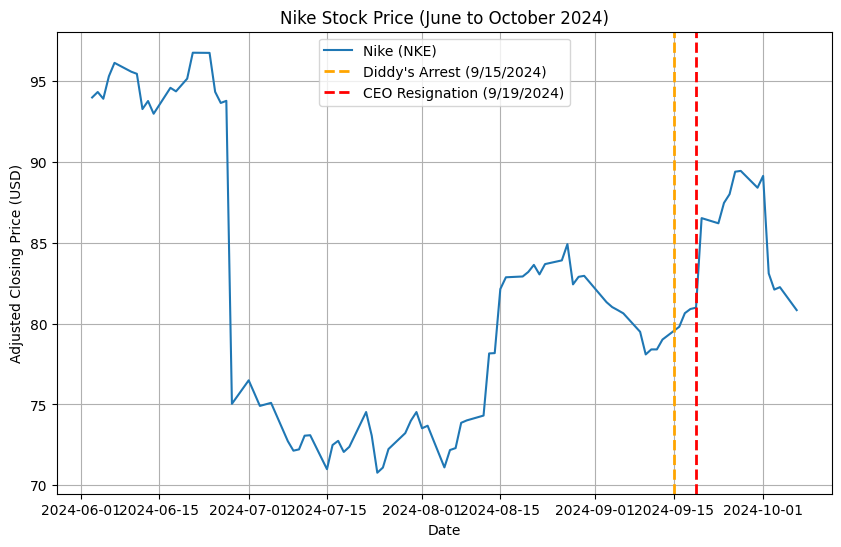

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(nike_data, label='Nike (NKE)')
plt.title('Nike Stock Price (June to October 2024)')


diddy_arrest_date = '2024-09-15'
ceo_resignation_date = '2024-09-19'
plt.axvline(pd.to_datetime(diddy_arrest_date), color='orange', linestyle='--', linewidth=2, label="Diddy's Arrest (9/15/2024)")
plt.axvline(pd.to_datetime(ceo_resignation_date), color='red', linestyle='--', linewidth=2, label='CEO Resignation (9/19/2024)')


for report_date in earnings_2024['reportedDate']:
    plt.axvline(x=report_date, color='red', linestyle='--', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta


stock_api_key = 'yourapikey'

def get_earnings(stock_symbol):
    url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={stock_symbol}&apikey={stock_api_key}'
    response = requests.get(url)

    if response.status_code == 200:
        earnings_data = response.json()
        if 'quarterlyEarnings' in earnings_data:
            earnings_df = pd.DataFrame(earnings_data['quarterlyEarnings'])
            return earnings_df
        else:
            print("No earnings data found.")
            return pd.DataFrame()
    else:
        print(f"Error fetching earnings: {response.status_code} - {response.text}")
        return pd.DataFrame()


nike_earnings = get_earnings('NKE')


print("Nike Quarterly Earnings:\n", nike_earnings)


Nike Quarterly Earnings:
     fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise  \
0         2024-08-31   2024-10-01         0.7         0.52     0.18   
1         2024-05-31   2024-06-27        1.01         0.83     0.18   
2         2024-02-29   2024-03-21        0.98         0.74     0.24   
3         2023-11-30   2023-12-21        1.03         0.85     0.18   
4         2023-08-31   2023-09-28        0.94         0.75     0.19   
..               ...          ...         ...          ...      ...   
110       1997-02-28   1997-03-20         0.1         0.09     0.01   
111       1996-11-30   1996-12-18        0.08         0.07     0.01   
112       1996-08-31   1996-09-16         0.1         0.09     0.01   
113       1996-05-31   1996-07-09        0.07         0.06     0.01   
114       1996-02-29   1996-03-14        0.05         0.05        0   

    surprisePercentage   reportTime  
0              34.6154   pre-market  
1              21.6867  post-market  
2      

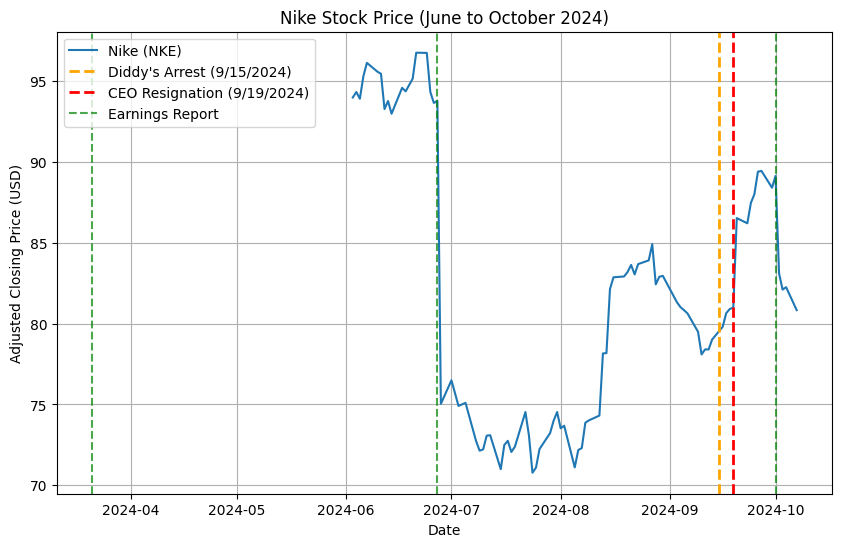

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(nike_data, label='Nike (NKE)')
plt.title('Nike Stock Price (June to October 2024)')


diddy_arrest_date = '2024-09-15'
ceo_resignation_date = '2024-09-19'
plt.axvline(pd.to_datetime(diddy_arrest_date), color='orange', linestyle='--', linewidth=2, label="Diddy's Arrest (9/15/2024)")
plt.axvline(pd.to_datetime(ceo_resignation_date), color='red', linestyle='--', linewidth=2, label='CEO Resignation (9/19/2024)')


first_label = True
for report_date in earnings_2024['reportedDate']:
    if first_label:
        plt.axvline(x=report_date, color='green', linestyle='--', alpha=0.7, label='Earnings Report')
        first_label = False
    else:
        plt.axvline(x=report_date, color='green', linestyle='--', alpha=0.7)


plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


The decline in stock price post-earnings report suggests that the market reacted unfavorably to the information released. This could have been due to various factors, such as disappointing earnings results, weaker sales figures, or a lower-than-expected outlook, leading to decreased investor confidence.

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta


news_api_key = 'yourapikey'



def get_news(stock_symbol, from_date, to_date):
    url = f'https://newsapi.org/v2/everything?q={stock_symbol}&from={from_date}&to={to_date}&sortBy=popularity&apiKey={news_api_key}'
    response = requests.get(url)

    if response.status_code == 200:
        news_data = response.json()
        if 'articles' in news_data:
            articles = pd.DataFrame(news_data['articles'])
            return articles[['publishedAt', 'title', 'description']]
        else:
            print("No articles found.")
            return pd.DataFrame(columns=['publishedAt', 'title', 'description'])
    else:
        print(f"Error fetching news: {response.status_code} - {response.text}")
        return pd.DataFrame(columns=['publishedAt', 'title', 'description'])


In [ ]:
stock_symbol = 'NKE'
from_date = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
to_date = datetime.now().strftime('%Y-%m-%d')

nike_news = get_news(stock_symbol, from_date, to_date)
print("Nike News:")
print(nike_news)

Nike News:
             publishedAt                                              title  \
0   2024-10-04T12:00:19Z  OpenAI leadership exodus: Why this management ...   
1   2024-10-01T21:10:00Z  Nike reports stock dip, announces it's pushing...   
2   2024-10-01T17:53:00Z   Nike's stock is in 'no man's land,' says analyst   
3   2024-10-02T15:48:00Z  Nike's stock tumbles as investors worry about ...   
4   2024-09-19T22:10:00Z  Nike replaces its CEO with a longtime veteran ...   
..                   ...                                                ...   
95  2024-10-03T17:26:48Z  First Financial Bank Trust Division Sells 841 ...   
96  2024-10-02T11:10:25Z  Cim LLC Sells 116,659 Shares of NIKE, Inc. (NY...   
97  2024-09-11T10:49:04Z  Strategic Financial Concepts LLC Buys Shares o...   
98  2024-09-27T11:42:50Z  Luxor Capital Group LP Acquires Shares of 3,00...   
99  2024-09-28T18:57:03Z  MBB Public Markets I LLC Buys 81,898 Shares of...   

                                        

In [ ]:
nike_news['publishedAt']=pd.to_datetime(nike_news['publishedAt'])

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)

    return analysis.sentiment.polarity


nike_news['sentiment'] = nike_news['title'].apply(lambda x: get_sentiment(x) if pd.notnull(x) else 0)


print(nike_news.head())


                publishedAt  \
0 2024-10-04 00:00:00+00:00   
1 2024-10-01 00:00:00+00:00   
2 2024-10-01 00:00:00+00:00   
3 2024-10-02 00:00:00+00:00   
4 2024-09-19 00:00:00+00:00   

                                               title  \
0  OpenAI leadership exodus: Why this management ...   
1  Nike reports stock dip, announces it's pushing...   
2   Nike's stock is in 'no man's land,' says analyst   
3  Nike's stock tumbles as investors worry about ...   
4  Nike replaces its CEO with a longtime veteran ...   

                                         description  sentiment  
0  It happened with Starbucks (SBUX) it happened ...   0.000000  
1  Nike (NKE) is striving to “Just Do It,” but it...   0.000000  
2  As Nike (NKE) gears up for a pivotal leadershi...   0.000000  
3  Nike’s (NKE) shares dropped 8% during early tr...   0.136364  
4  A leadership change is underway at Nike (NKE) ...   0.000000  


In [ ]:
nike_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   publishedAt  100 non-null    datetime64[ns, UTC]
 1   title        100 non-null    object             
 2   description  98 non-null     object             
 3   sentiment    100 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
nike_news['publishedAt'] = pd.to_datetime(nike_news['publishedAt']).dt.tz_convert(None)

Date 2024-09-29 00:00:00 not found in stock data.
Date 2024-09-14 00:00:00 not found in stock data.
Date 2024-09-14 00:00:00 not found in stock data.
Date 2024-10-06 00:00:00 not found in stock data.
Date 2024-09-14 00:00:00 not found in stock data.
Date 2024-09-29 00:00:00 not found in stock data.
Date 2024-09-28 00:00:00 not found in stock data.
Date 2024-09-29 00:00:00 not found in stock data.
Date 2024-09-15 00:00:00 not found in stock data.
Date 2024-10-09 00:00:00 not found in stock data.
Date 2024-09-21 00:00:00 not found in stock data.
Date 2024-09-15 00:00:00 not found in stock data.
Date 2024-09-29 00:00:00 not found in stock data.
Date 2024-09-21 00:00:00 not found in stock data.
Date 2024-09-28 00:00:00 not found in stock data.
Date 2024-10-08 00:00:00 not found in stock data.
Date 2024-09-14 00:00:00 not found in stock data.
Date 2024-09-22 00:00:00 not found in stock data.
Date 2024-09-15 00:00:00 not found in stock data.
Date 2024-09-21 00:00:00 not found in stock data.


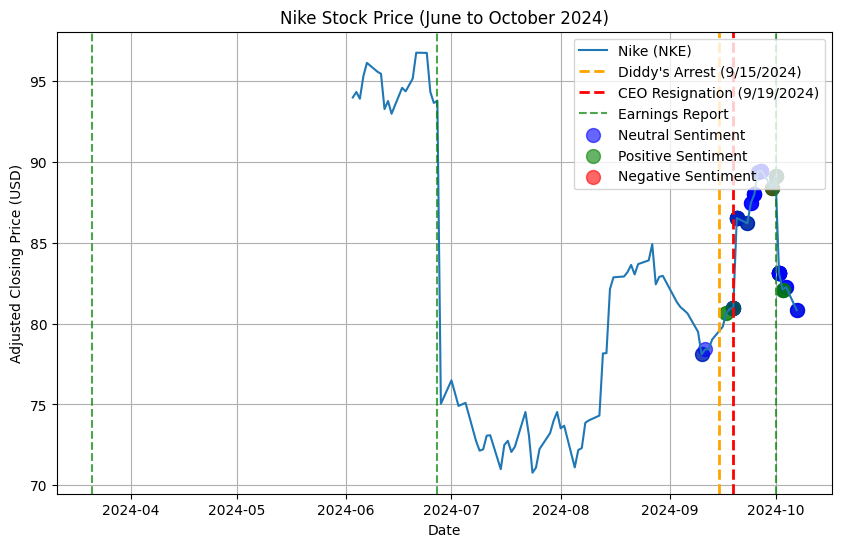

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(10, 6))
plt.plot(nike_data, label='Nike (NKE)')
plt.title('Nike Stock Price (June to October 2024)')


diddy_arrest_date = '2024-09-15'
ceo_resignation_date = '2024-09-19'
plt.axvline(pd.to_datetime(diddy_arrest_date), color='orange', linestyle='--', linewidth=2, label="Diddy's Arrest (9/15/2024)")
plt.axvline(pd.to_datetime(ceo_resignation_date), color='red', linestyle='--', linewidth=2, label='CEO Resignation (9/19/2024)')


first_label = True
for report_date in earnings_2024['reportedDate']:
    if first_label:
        plt.axvline(x=report_date, color='green', linestyle='--', alpha=0.7, label='Earnings Report')
        first_label = False
    else:
        plt.axvline(x=report_date, color='green', linestyle='--', alpha=0.7)

positive_label, neutral_label, negative_label = True, True, True

# Plotting sentiment markers
for index, row in nike_news.iterrows():
    sentiment = row['sentiment']
    date = row['publishedAt']

    # Use the 'nearest' method to find the closest matching date in the stock data
    try:
        closest_date_idx = nike_data.index.get_loc(date)
        closest_date = nike_data.index[closest_date_idx]

        # Set marker color based on sentiment: positive (green), neutral (blue), negative (red)
        if sentiment > 0:
            color = 'green'
            if positive_label:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, label='Positive Sentiment', alpha=0.6)
                positive_label = False
            else:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, alpha=0.6)
        elif sentiment == 0:
            color = 'blue'
            if neutral_label:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, label='Neutral Sentiment', alpha=0.6)
                neutral_label = False
            else:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, alpha=0.6)
        else:
            color = 'red'
            if negative_label:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, label='Negative Sentiment', alpha=0.6)
                negative_label = False
            else:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, alpha=0.6)
    except KeyError:
        print(f"Date {date} not found in stock data.")



plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Date 2024-09-29 00:00:00 not found in stock data.
Date 2024-09-14 00:00:00 not found in stock data.
Date 2024-09-14 00:00:00 not found in stock data.
Date 2024-10-06 00:00:00 not found in stock data.
Date 2024-09-14 00:00:00 not found in stock data.
Date 2024-09-29 00:00:00 not found in stock data.
Date 2024-09-28 00:00:00 not found in stock data.
Date 2024-09-29 00:00:00 not found in stock data.
Date 2024-09-15 00:00:00 not found in stock data.
Date 2024-10-09 00:00:00 not found in stock data.
Date 2024-09-21 00:00:00 not found in stock data.
Date 2024-09-15 00:00:00 not found in stock data.
Date 2024-09-29 00:00:00 not found in stock data.
Date 2024-09-21 00:00:00 not found in stock data.
Date 2024-09-28 00:00:00 not found in stock data.
Date 2024-10-08 00:00:00 not found in stock data.
Date 2024-09-14 00:00:00 not found in stock data.
Date 2024-09-22 00:00:00 not found in stock data.
Date 2024-09-15 00:00:00 not found in stock data.
Date 2024-09-21 00:00:00 not found in stock data.


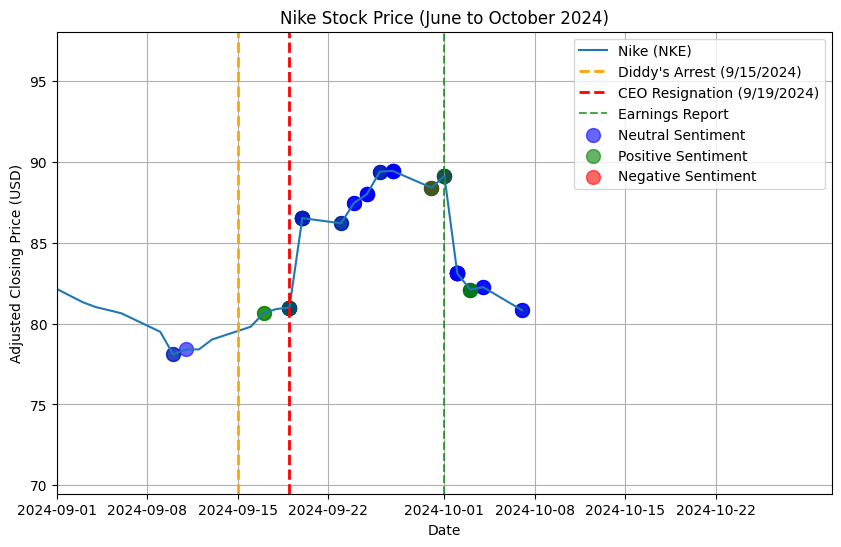

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.plot(nike_data, label='Nike (NKE)')
plt.title('Nike Stock Price (June to October 2024)')


diddy_arrest_date = '2024-09-15'
ceo_resignation_date = '2024-09-19'
plt.axvline(pd.to_datetime(diddy_arrest_date), color='orange', linestyle='--', linewidth=2, label="Diddy's Arrest (9/15/2024)")
plt.axvline(pd.to_datetime(ceo_resignation_date), color='red', linestyle='--', linewidth=2, label='CEO Resignation (9/19/2024)')


first_label = True
for report_date in earnings_2024['reportedDate']:
    if first_label:
        plt.axvline(x=report_date, color='green', linestyle='--', alpha=0.7, label='Earnings Report')
        first_label = False
    else:
        plt.axvline(x=report_date, color='green', linestyle='--', alpha=0.7)

positive_label, neutral_label, negative_label = True, True, True


for index, row in nike_news.iterrows():
    sentiment = row['sentiment']
    date = row['publishedAt']

    # Use the 'nearest' method to find the closest matching date in the stock data
    try:
        closest_date_idx = nike_data.index.get_loc(date)
        closest_date = nike_data.index[closest_date_idx]

        # Set marker color based on sentiment: positive (green), neutral (blue), negative (red)
        if sentiment > 0:
            color = 'green'
            if positive_label:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, label='Positive Sentiment', alpha=0.6)
                positive_label = False
            else:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, alpha=0.6)
        elif sentiment == 0:
            color = 'blue'
            if neutral_label:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, label='Neutral Sentiment', alpha=0.6)
                neutral_label = False
            else:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, alpha=0.6)
        else:
            color = 'red'
            if negative_label:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, label='Negative Sentiment', alpha=0.6)
                negative_label = False
            else:
                plt.scatter(closest_date, nike_data.loc[closest_date], color=color, s=100, alpha=0.6)
    except KeyError:
        print(f"Date {date} not found in stock data.")

# Set x-axis limits to focus on September and October 2024
plt.xlim(pd.to_datetime('2024-09-01'), pd.to_datetime('2024-10-31'))


plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


A sharp decline in stock after the earnings reports.
The ceo transition has received the neutral reactions and the stocks increased slightly but didn't stabilise

[*********************100%***********************]  1 of 1 completed


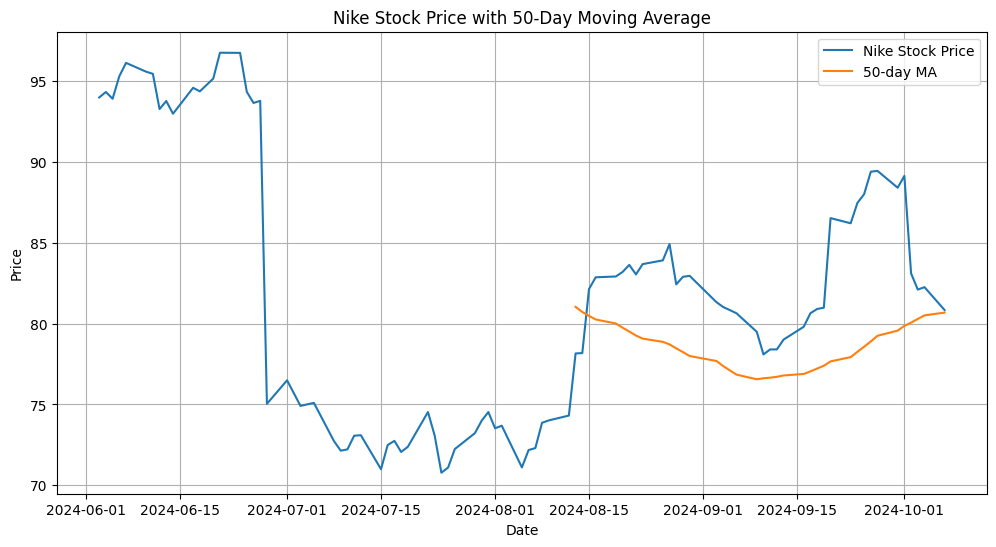

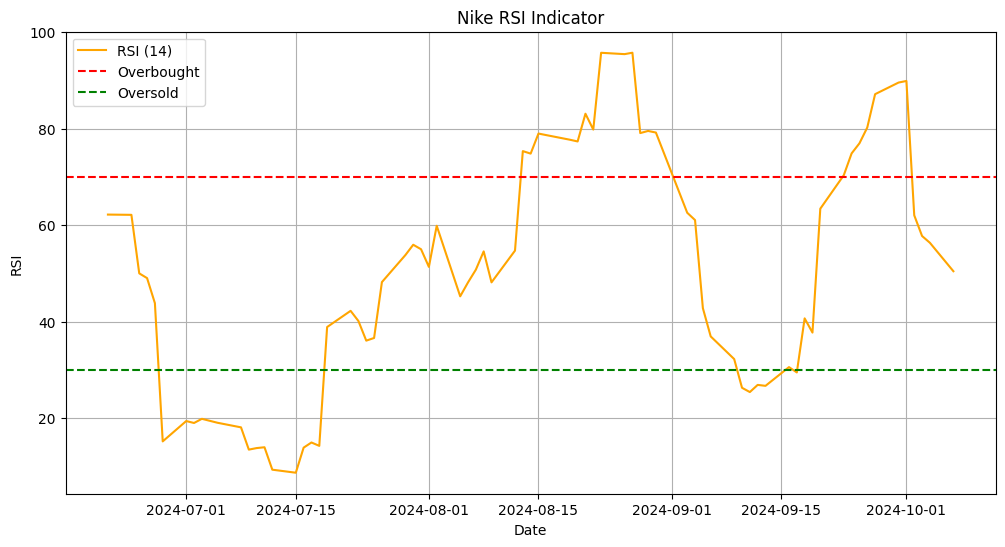

In [ ]:
ticker = 'NKE'
data = yf.download(ticker, start='2024-06-01', end='2024-10-08')


data['50_MA'] = data['Adj Close'].rolling(window=50).mean()


def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['Adj Close'])


plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Nike Stock Price')
plt.plot(data['50_MA'], label='50-day MA')
plt.title('Nike Stock Price with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(data['RSI'], label='RSI (14)', color='orange')
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='green', label='Oversold')
plt.title('Nike RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


In Mid-July, RSI Below 30 : oversold condition, meaning the stock may have experienced excessive selling pressure
In Mid-September, RSI > 70 is considered overbought, signaling that the stock may have experienced excessive buying.
After peaking above 70, the RSI has started to trend downward, indicating that the stock is losing its bullish momentum.

The stock has experienced significant volatility with potential buying and selling opportunities driven by short-term market sentiment.

In [ ]:
symbols = ['NKE', 'ADDYY', 'PUMSY']
fundamentals = {}


for symbol in symbols:
    stock = yf.Ticker(symbol)
    info = stock.info  # Use `info` to access detailed financial data
    fundamentals[symbol] = {
        'PE_Ratio': info.get('forwardPE'),
        'EPS': info.get('forwardEps'),
        'Dividend_Yield': info.get('dividendYield')
    }


fundamental_data = pd.DataFrame({
    'Symbol': [symbol for symbol in symbols],
    'PE_Ratio': [fundamentals[s]['PE_Ratio'] for s in symbols],
    'EPS': [fundamentals[s]['EPS'] for s in symbols],
    'Dividend_Yield': [fundamentals[s]['Dividend_Yield'] for s in symbols]
})


print(fundamental_data)


  Symbol   PE_Ratio   EPS  Dividend_Yield
0    NKE  25.345680  3.24          0.0181
1  ADDYY  15.180327  8.54          0.0029
2  PUMSY        NaN   NaN          0.0228


Nike has a higher P/E ratio, indicating stronger growth expectations from investors, but its EPS is lower than Adidas. This suggests investors are likely valuing future growth potential more than current profitability.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

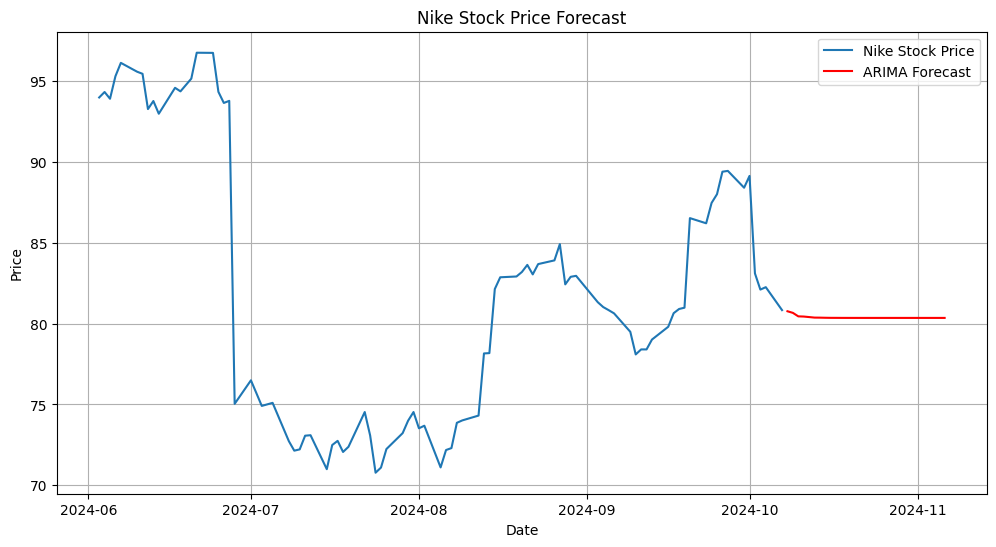

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# ARIMA Forecasting for Nike
model = ARIMA(data['Adj Close'], order=(5,1,0))
model_fit = model.fit()


forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=30)


plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Nike Stock Price')
plt.plot(forecast_dates, forecast, label='ARIMA Forecast', color='red')
plt.title('Nike Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


No significant improvement in the stocks

The stock has been volatile, with recent bearish trends following the earnings report. High P/E ratios compared to competitors like Adidas suggest that Nike is being priced for future growth, but the market is sensitive to short-term earnings disappointments.

Recommendation: Nike should prioritize cost-cutting initiatives and improve supply chain efficiencies to enhance margins. Operational improvements would ensure consistent earnings performance, which can support investor confidence and reduce stock volatility.

Nike has seen periods of both bullish and bearish sentiment, as reflected in the RSI and moving average fluctuations. The company’s high valuation implies that investors are looking for continued growth, and focusing on innovation can help meet these expectations.

Recommendation: Nike should double down on its direct-to-consumer (DTC) and digital transformation efforts, such as leveraging its SNKRS app, online retail, and engaging customers through unique brand experiences